# Real World Example: 
### AI, Machine Learning & Data Science 

---

# What is the Value for your Business?


- By seeing acutal examples you'll be empowered to ask the right questions (and get fair help from consultants, startups, or data analytics companies)
- This will help you make the correct decisions for your business

# Demystify

This is a real world example of how you'd solve a Machine Learning prediciton problem.

**Common Machine Learning Use Cases in Companies:**
- Discover churn risk of customers
- Predict optimal price levels (investments / retail)
- Predict future revenues
- Build recommendation systems
- Customer value scoring
- Fraud detection
- Customer insights (characteristics)
- Predict sentiment of text / client feedback
- Object detecton in images
- etc etc...

## Why Python?

Python is general purpose and can do Software development, Web development, AI. Python has experienced incredible growth over the last couple of years.

<img src='https://zgab33vy595fw5zq-zippykid.netdna-ssl.com/wp-content/uploads/2017/09/growth_major_languages-1-1400x1200.png' width=400px></img>

Source: https://stackoverflow.blog/2017/09/06/incredible-growth-python/

# Everything is free!

The best software today is open source and it's also enterprise-ready. Anyone can download and use them for free (even for business purposes).

**Examples of great, free AI libraries:**
* Anaconda
* Google's TensorFlow
* Scikit-learn
* Pandas
* Keras
* Matplotlib
* SQL
* Spark
* Numpy

## State-of-the-Art algorithms

No matter what algorithm you want to use (Linear Regression, Random Forests, Neural Networks, or Deep Learning), **all of the latest methods are implemented optimized for Python**.

## Big Data

Python code can run on any computer. Therefore, you can scale your computations and utilize for example cloud resources to run big data jobs.

**Great tools for Big Data:**
- Spark
- Databricks
- Hadoop / MapReduce
- Kafka
- Amazon EC2
- Amazon S3


# Note on data collection

- Collect all the data you can! (storage is cheap)

---

----
# Real world example of AI: Titanic Analysis

Titanic notebook is open source. All of our material is online. Anyone can develop sophisticated AI programs and solutions.

___
## The difficult part is never to implement the algorithm

Many times the difficult part of a machine learning problem is to get data into the right format so you can train your models, not the actual implementations or training of the models. We'll illustrate this below.
___

![data-x](http://oi64.tinypic.com/o858n4.jpg)


# __Titanic Survivor Analysis__


**Sources:** 
* **Training + explanations**: https://www.kaggle.com/c/titanic

___
___



# Understanding the connections between passanger information and survival rate

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

### **Our task is to train a machine learning model on a data set consisting of 891 samples of people who were onboard of the Titanic. And then, be able to predict if the passengers survived or not.**

# Import packages

In [2]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

from plot_distribution import plot_distribution
plt.rcParams['figure.figsize'] = (9, 5)

### Load Data

In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id='sec3'></a>
___
## Part 2: Exploring the Data
**Data descriptions**

<img src="data/Titanic_Variable.png">

In [6]:
# preview the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# General data statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Histograms

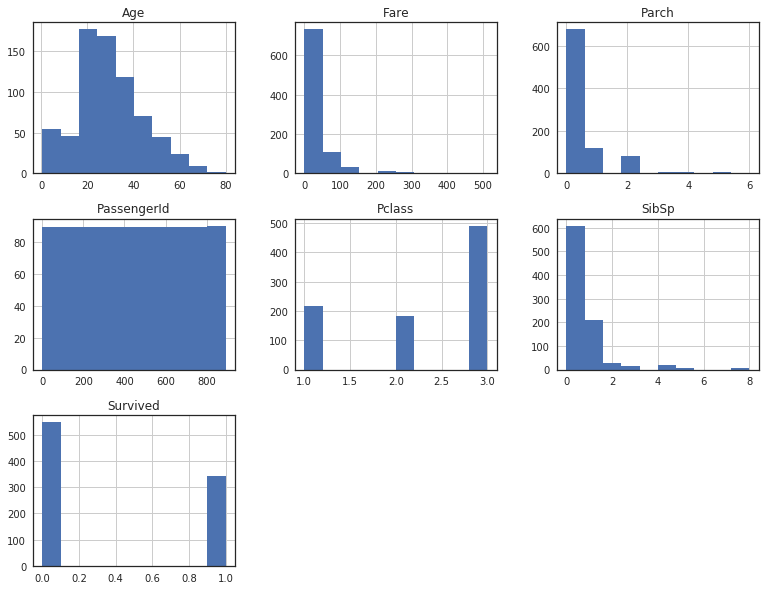

In [8]:
df.hist(figsize=(13,10));

In [9]:
# Balanced data set?
y_numbers = df['Survived'].map({0:'Deceased',1:'Survived'}).value_counts()

y_numbers

Deceased    549
Survived    342
Name: Survived, dtype: int64

In [13]:
# Imbalanced data set, our classifiers have to outperform 62 % accuracy

y_numbers[0] / (y_numbers[1] +y_numbers[0])


0.6161616161616161

> #### __Interesting Fact:__ 

> Third Class passengers were the first to board, with First and Second Class passengers following up to an hour before departure. 

> Third Class passengers were inspected for ailments and physical impairments that might lead to their being refused entry to the United States, while First Class passengers were personally greeted by Captain Smith.

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Analysis of survival rate for the socioeconmic classes?

df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True) \
                    .mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


___

> #### __Brief Remarks Regarding the Data__

> * `PassengerId` is a random number (incrementing index) and thus does not contain any valuable information. 

> * `Survived, Passenger Class, Age, Siblings Spouses, Parents Children` and `Fare` are numerical values (no need to transform them) -- but, we might want to group them (i.e. create categorical variables). 

> * `Sex, Embarked` are categorical features that we need to map to integer values. `Name, Ticket` and `Cabin` might also contain valuable information.

___

In [16]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


### Dropping Unnecessary data
__Note:__ It is important to remove variables that convey information already captured by some other variable. Doing so removes the correlation, while also diminishing potential overfit.

In [17]:
# Drop columns 'Ticket', 'Cabin', 'Fare' need to do it 
# for both test and training

df = df.drop(['PassengerId','Ticket', 'Cabin','Fare'], axis=1)

In [18]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,C


<a id='sec4'></a>
____
## Part 3: Transforming the data

### 3.1 _The Title of the person can be used to predict survival_

In [19]:
# List example titles in Name column
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [20]:
# Create column called Title

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
# Double check that our titles makes sense (by comparing to sex)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [22]:
# Map rare titles to one group

df['Title'] = df['Title'].\
              replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr',\
             'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss') #Mademoiselle
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs') #Madame

In [23]:
# We now have more logical (contemporary) titles, and fewer groups
# See if we can get some insights

df[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


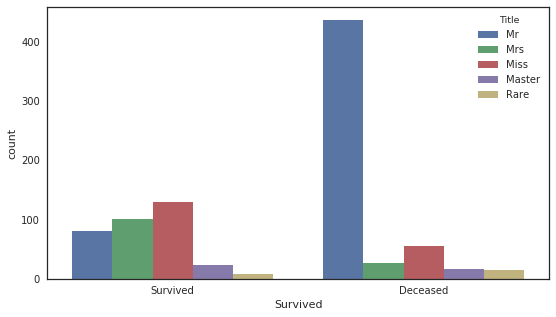

In [24]:
# We can plot the survival chance for each title

sns.countplot(x='Survived', hue="Title", data=df, order=[1,0])
plt.xticks(range(2),['Survived','Deceased']);

In [25]:
# Title dummy mapping: Map titles to binary dummy columns

binary_encoded = pd.get_dummies(df.Title)
df[binary_encoded.columns] = binary_encoded

In [26]:
# Remove unique variables for analysis (Title is generally bound to Name, so it's also dropped)
df = df.drop(['Name', 'Title'], axis=1)

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Master,Miss,Mr,Mrs,Rare
0,0,3,male,22.0,1,0,S,0,0,1,0,0
1,1,1,female,38.0,1,0,C,0,0,0,1,0
2,1,3,female,26.0,0,0,S,0,1,0,0,0
3,1,1,female,35.0,1,0,S,0,0,0,1,0
4,0,3,male,35.0,0,0,S,0,0,1,0,0


### Map Gender column to binary (male = 0, female = 1) categories

In [28]:
# convert categorical variable to numeric

df['Sex'] = df['Sex']. \
    map( {'female': 1, 'male': 0} ).astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Master,Miss,Mr,Mrs,Rare
0,0,3,0,22.0,1,0,S,0,0,1,0,0
1,1,1,1,38.0,1,0,C,0,0,0,1,0
2,1,3,1,26.0,0,0,S,0,1,0,0,0
3,1,1,1,35.0,1,0,S,0,0,0,1,0
4,0,3,0,35.0,0,0,S,0,0,1,0,0


### Handle missing values for age

In [29]:
df.Age = df.Age.fillna(df.Age.median())

### Split age into bands and look at survival rates

In [30]:
# Age bands
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False)\
                    .mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


### Suvival probability against age

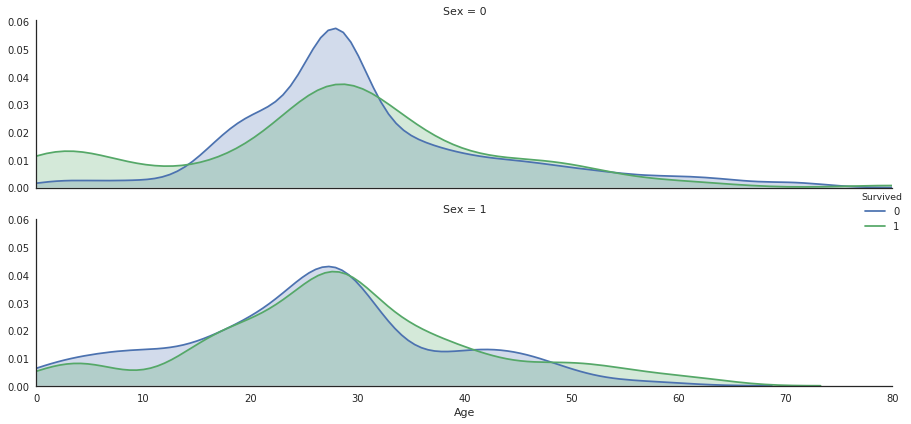

In [31]:
# Plot the relative survival rate distributions against Age of passangers
# subsetted by the gender

plot_distribution( df , var = 'Age' , target = 'Survived' ,\
                  row = 'Sex' )

# Recall: {'male': 0, 'female': 1}

In [32]:
# Change Age column to
# map Age ranges (AgeBands) to ordinal integer numbers

df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age']=4
df = df.drop(['AgeBand'], axis=1)

df.head()

# Note we could just run 
# df['Age'] = pd.cut(df['Age'], 5,labels=[0,1,2,3,4])

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Master,Miss,Mr,Mrs,Rare
0,0,3,0,1.0,1,0,S,0,0,1,0,0
1,1,1,1,2.0,1,0,C,0,0,0,1,0
2,1,3,1,1.0,0,0,S,0,1,0,0,0
3,1,1,1,2.0,1,0,S,0,0,0,1,0
4,0,3,0,2.0,0,0,S,0,0,1,0,0


### Travel Party Size

How did the number of people the person traveled with impact the chance of survival?

In [33]:
# SibSp = Number of Sibling / Spouses
# Parch = Parents / Children

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Survival chance against FamilySize
df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True) \
                                .mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


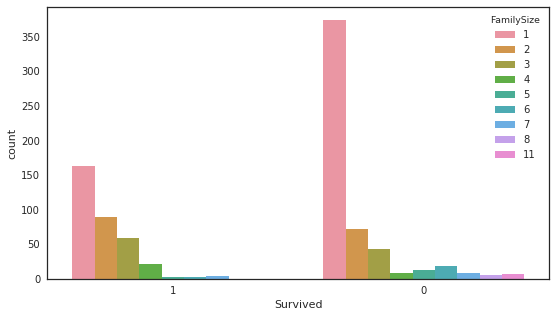

In [34]:
# Plot it, 1 is survived

sns.countplot(x='Survived', hue="FamilySize", data=df, order=[1,0]);

In [35]:
# Create binary variable if the person was alone or not

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=True).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [36]:
# We will only use the binary IsAlone feature for further analysis

df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)

df.head()

,Survived,Pclass,Sex,Age,Embarked,Master,Miss,Mr,Mrs,Rare,IsAlone
0,0,3,0,1.0,S,0,0,1,0,0,0
1,1,1,1,2.0,C,0,0,0,1,0,0
2,1,3,1,1.0,S,0,1,0,0,0,1
3,1,1,1,2.0,S,0,0,0,1,0,0
4,0,3,0,2.0,S,0,0,1,0,0,1


# Feature construction

In [37]:
# We can also create new features based on intuitive combinations
# Here is an example when we say that the age times socioclass is a determinant factor

df['Age*Class'] = df.Age.values * df.Pclass.values

df.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3


In [38]:
df[['Age*Class', 'Survived']].groupby(['Age*Class'], as_index=True).mean()

,Survived
Age*Class,
0.0,0.550000
1.0,0.640449
2.0,0.530488
3.0,0.277487
4.0,0.418182
6.0,0.149425
8.0,0.000000
9.0,0.111111
12.0,0.000000


## Port the person embarked from
Let's see how that influences chance of survival

<img src= "data/images/titanic_voyage_map.png">
>___


In [39]:
# Fill NaN 'Embarked' Values in the dfs
freq_port = df['Embarked'].dropna().mode()[0]
df['Embarked'] = df['Embarked'].fillna(freq_port)
    

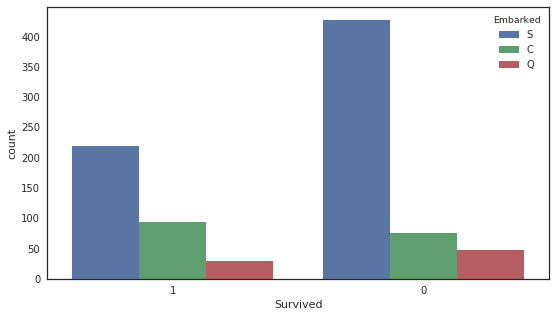

In [40]:
# Plot it, 1 is survived

sns.countplot(x='Survived', hue="Embarked", data=df, order=[1,0]);

In [41]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True) \
                    .mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [42]:
# Create categorical dummy variables for Embarked values

binary_encoded = pd.get_dummies(df.Embarked)
df[binary_encoded.columns] = binary_encoded
df.drop('Embarked', axis=1, inplace=True)

df.head()

,Survived,Pclass,Sex,Age,Master,Miss,Mr,Mrs,Rare,IsAlone,Age*Class,C,Q,S
0,0,3,0,1.0,0,0,1,0,0,0,3.0,0,0,1
1,1,1,1,2.0,0,0,0,1,0,0,2.0,1,0,0
2,1,3,1,1.0,0,1,0,0,0,1,3.0,0,0,1
3,1,1,1,2.0,0,0,0,1,0,0,2.0,0,0,1
4,0,3,0,2.0,0,0,1,0,0,1,6.0,0,0,1


### Finished -- Preprocessing Complete!

In [43]:
# All features are approximately on the same scale
# no need for feature engineering / normalization

df.head(7)

,Survived,Pclass,Sex,Age,Master,Miss,Mr,Mrs,Rare,IsAlone,Age*Class,C,Q,S
0,0,3,0,1.0,0,0,1,0,0,0,3.0,0,0,1
1,1,1,1,2.0,0,0,0,1,0,0,2.0,1,0,0
2,1,3,1,1.0,0,1,0,0,0,1,3.0,0,0,1
3,1,1,1,2.0,0,0,0,1,0,0,2.0,0,0,1
4,0,3,0,2.0,0,0,1,0,0,1,6.0,0,0,1
5,0,3,0,1.0,0,0,1,0,0,1,3.0,0,1,0
6,0,1,0,3.0,0,0,1,0,0,1,3.0,0,0,1


### Sanity Check: View the correlation between features

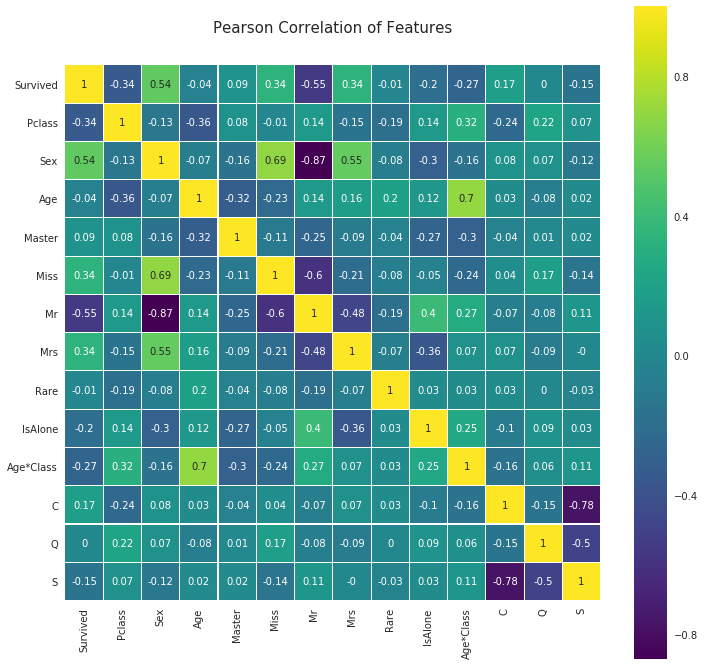

In [44]:
# Uncorrelated features are generally more powerful predictors

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, \
            linecolor='white', annot=True);

<a id='sec5'></a>
___
### Machine Learning, Prediction and Artifical Intelligence
Now we will use Machine Learning algorithms in order to predict if the person survived. 

**We will choose the best model from:**
1. Logistic Regression
2. K-Nearest Neighbors (KNN) 
3. Support Vector Machines (SVM)
4. Perceptron
5. XGBoost
6. Random Forest
7. Neural Network (Deep Learning)

### Setup Training and Validation Sets

In [45]:
X = df.drop("Survived", axis=1) # Training & Validation data
Y = df["Survived"]              # Response / Target Variable

print(X.shape, Y.shape)

(891, 13) (891,)


In [46]:
# Split training set so that we validate on 20% of the data
# Note that our algorithms will never have seen the validation 

np.random.seed(1337) # set random seed for reproducibility

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = \
                train_test_split(X, Y, test_size=0.2)

print('Training Samples:', X_train.shape, Y_train.shape)
print('Validation Samples:', X_val.shape, Y_val.shape)

Training Samples: (712, 13) (712,)
Validation Samples: (179, 13) (179,)


___
> ## General ML workflow
> 1. Create Model Object
> 2. Train the Model
> 3. Predict on _unseen_ data
> 4. Evaluate accuracy.

___

## Compare Different Prediciton Models

### 1. Logistic Regression

In [47]:
logreg = LogisticRegression()           # create
logreg.fit(X_train, Y_train)            # train
acc_log_2 = logreg.score(X_val, Y_val)  # predict & evaluate

print('Logistic Regression accuracy:',\
      str(round(acc_log_2*100,2)),'%')

Logistic Regression accuracy: 77.65 %


### 2. K-Nearest Neighbour

In [48]:
knn = KNeighborsClassifier(n_neighbors = 5)                  # instantiate
knn.fit(X_train, Y_train)                                    # fit
acc_knn = knn.score(X_val, Y_val)                            # predict + evaluate

print('K-Nearest Neighbors labeling accuracy:', str(round(acc_knn*100,2)),'%')                                

K-Nearest Neighbors labeling accuracy: 81.56 %


### 3. Support Vector Machine

In [49]:
# Support Vector Machines Classifier (non-linear kernel)
svc = SVC()                                                  # instantiate
svc.fit(X_train, Y_train)                                    # fit
acc_svc = svc.score(X_val, Y_val)                            # predict + evaluate

print('Support Vector Machines labeling accuracy:', str(round(acc_svc*100,2)),'%')

Support Vector Machines labeling accuracy: 82.12 %


### 4. Perceptron

In [50]:
perceptron = Perceptron()                                    # instantiate 
perceptron.fit(X_train, Y_train)                             # fit
acc_perceptron = perceptron.score(X_val, Y_val)              # predict + evalaute

print('Perceptron labeling accuracy:', str(round(acc_perceptron*100,2)),'%')

Perceptron labeling accuracy: 81.56 %


### 5. Gradient Boosting

In [51]:
# XGBoost, same API as scikit-learn
gradboost = xgb.XGBClassifier(n_estimators=1000)             # instantiate
gradboost.fit(X_train, Y_train)                              # fit
acc_xgboost = gradboost.score(X_val, Y_val)                  # predict + evalute

print('XGBoost labeling accuracy:', str(round(acc_xgboost*100,2)),'%')

XGBoost labeling accuracy: 81.01 %


### 6. Random Forest

In [52]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=500)   # instantiate
random_forest.fit(X_train, Y_train)                         # fit
acc_rf = random_forest.score(X_val, Y_val)                  # predict + evaluate

print('Random Forest labeling accuracy:', str(round(acc_rf*100,2)),'%')

Random Forest labeling accuracy: 79.89 %


### 7. Neural Networks (Deep Learning)

In [53]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [54]:
model = Sequential()
model.add( Dense(units=300, activation='relu', input_shape=(13,) ))
model.add( Dense(units=100, activation='relu'))
model.add( Dense(units=50, activation='relu'))
model.add( Dense(units=1, activation='sigmoid') )

In [55]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 50, batch_size= 50)

Epoch 1/50
712/712 [==============================] - 1s 857us/step - loss: 0.6093 - acc: 0.6390
Epoch 2/50
712/712 [==============================] - 0s 104us/step - loss: 0.4946 - acc: 0.7851
Epoch 3/50
712/712 [==============================] - 0s 90us/step - loss: 0.4471 - acc: 0.8006
Epoch 4/50
712/712 [==============================] - 0s 86us/step - loss: 0.4323 - acc: 0.7992
Epoch 5/50
712/712 [==============================] - 0s 125us/step - loss: 0.4243 - acc: 0.8160
Epoch 6/50
712/712 [==============================] - 0s 79us/step - loss: 0.4320 - acc: 0.8062
Epoch 7/50
712/712 [==============================] - 0s 98us/step - loss: 0.4128 - acc: 0.8272
Epoch 8/50
712/712 [==============================] - 0s 101us/step - loss: 0.4052 - acc: 0.8188
Epoch 9/50
712/712 [==============================] - 0s 77us/step - loss: 0.4035 - acc: 0.8329
Epoch 10/50
712/712 [==============================] - 0s 79us/step - loss: 0.4026 - acc: 0.8315
Epoch 11/50
712/712 [==============

In [56]:
# # Evaluate the model Accuracy on test set
print('Neural Network accuracy:',str(round(model.evaluate(X_val, Y_val, batch_size=50,verbose=False)[1]*100,2)),'%')

Neural Network accuracy: 80.45 %


### Importance scores in the random forest model

Training accuracy Random Forest: 0.8497191011235955


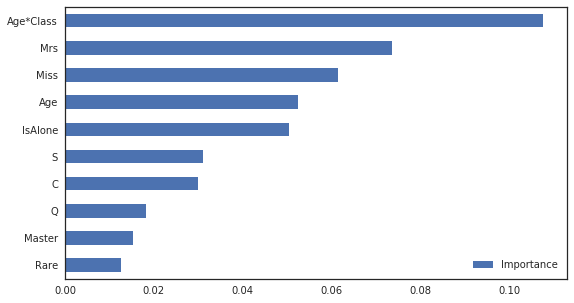

In [57]:
# Look at importnace of features for random forest

def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print ('Training accuracy Random Forest:',model.score( X , y ))

plot_model_var_imp(random_forest, X_train, Y_train)

<a id='sec6'></a>
___

## Appendix I:
#### Why are our models maxing out at around 80%?


#### __John Jacob Astor__

<img src= "data/images/john-jacob-astor.jpg"> 

John Jacob Astor perished in the disaster even though our model predicted he would survive. Astor was the wealthiest person on the Titanic -- his ticket fare was valued at over 35,000 USD in 2016 -- it seems likely that he would have been among of the approximatelly 35 percent of men in first class to survive. However, this was not the case: although his pregnant wife survived, John Jacob Astor’s body was recovered a week later, along with a gold watch, a diamond ring with three stones, and no less than 92,481 USD (2016 value) in cash.

<br >


#### __Olaus Jorgensen Abelseth__

<img src= "data/images/olaus-jorgensen-abelseth.jpg">

Avelseth was a 25-year-old Norwegian sailor, a man in 3rd class, and not expected to survive by classifier. However, once the ship sank, he survived by swimming for 20 minutes in the frigid North Atlantic water before joining other survivors on a waterlogged collapsible boat.

Abelseth got married three years later, settled down as a farmer in North Dakota, had 4 kids, and died in 1980 at the age of 94.

<br >

### __Key Takeaway__ 

As engineers and business professionals we are trained to answer the question 'what could we do to improve on an 80 percent average'. These data points represent real people. Each time our model was wrong we should be glad -- in such misclasifications we will likely find incredible stories of human nature and courage triumphing over extremely difficult odds. 

__It is important to never lose sight of the human element when analyzing data that deals with people.__ 

<a id='sec7'></a>
___
## Appendix II: Resources and references to material we won't cover in detail

> * **Gradient Boosting:** http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/

> * **Jupyter Notebook (tutorial):** https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook

> * **K-Nearest Neighbors (KNN):** https://towardsdatascience.com/introduction-to-k-nearest-neighbors-3b534bb11d26

> * **Logistic Regression:** https://towardsdatascience.com/5-reasons-logistic-regression-should-be-the-first-thing-you-learn-when-become-a-data-scientist-fcaae46605c4

> * **Naive Bayes:** http://scikit-learn.org/stable/modules/naive_bayes.html

> * **Perceptron:** http://aass.oru.se/~lilien/ml/seminars/2007_02_01b-Janecek-Perceptron.pdf

> * **Random Forest:** https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d

> * **Support Vector Machines (SVM):** https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989


<br>
___
___

![](http://i67.tinypic.com/2jcbwcw.png)